In [28]:
#Install Java and Spark

# %% [code]
# Install Java
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

# Download Spark
!wget -q https://archive.apache.org/dist/spark/spark-3.0.0/spark-3.0.0-bin-hadoop3.2.tgz

# Unzip Spark
!tar xf spark-3.0.0-bin-hadoop3.2.tgz

# Set environment variables
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.0.0-bin-hadoop3.2"

# Install findspark
!pip install -q findspark


In [29]:
#Initialize Spark

# %% [code]
import findspark
findspark.init()
from pyspark.sql import SparkSession

# Create SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()


In [30]:
#Verify Spark Installation


# %% [code]
# Check Spark version
spark.version

# Output should be '3.0.0'

# %% [code]
# Print Spark Context information
print(spark.sparkContext)
print("Spark App Name : "+ spark.sparkContext.appName)


<SparkContext master=local appName=ALY6110_App>
Spark App Name : ALY6110_App


In [31]:
#Create and Use Spark Context

# %% [code]
# Stop the existing SparkContext
spark.sparkContext.stop()

# %% [code]
# Create new SparkContext
from pyspark import SparkContext
sc = SparkContext("local", "ALY6110_App")
print(sc.appName)


ALY6110_App


In [32]:
#Load the Dataset


# %% [code]
# Import necessary libraries
from pyspark.sql import SparkSession
from pyspark.sql.functions import col

# Initialize Spark session
spark = SparkSession.builder.appName("BostonHousingAnalysis").getOrCreate()

# Load the dataset (assuming it's available as a CSV in a specific path)
# If you're running this in Colab, you may need to upload the dataset first

##########################################################

from google.colab import files

#Part 1: Read the given .csv file
#Upload the files from the local
uploaded = files.upload()


#df = spark.read.csv("BostonHousing.csv", header=True, inferSchema=True)
#df.show(5)

# Get the filename from the uploaded files
filename = list(uploaded.keys())[0]

# Load the dataset into a PySpark DataFrame
df = spark.read.csv(filename, header=True, inferSchema=True)

##########################################################

#Part 2: Show the first five rows of the dataframe
# Show the first 5 rows of the DataFrame
df.show(5)

##########################################################

Saving BostonHousing.csv to BostonHousing (4).csv
+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+
|   crim|  zn|indus|chas|  nox|   rm| age|   dis|rad|tax|ptratio|     b|lstat|medv|
+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+
|0.00632|18.0| 2.31|   0|0.538|6.575|65.2|  4.09|  1|296|   15.3| 396.9| 4.98|24.0|
|0.02731| 0.0| 7.07|   0|0.469|6.421|78.9|4.9671|  2|242|   17.8| 396.9| 9.14|21.6|
|0.02729| 0.0| 7.07|   0|0.469|7.185|61.1|4.9671|  2|242|   17.8|392.83| 4.03|34.7|
|0.03237| 0.0| 2.18|   0|0.458|6.998|45.8|6.0622|  3|222|   18.7|394.63| 2.94|33.4|
|0.06905| 0.0| 2.18|   0|0.458|7.147|54.2|6.0622|  3|222|   18.7| 396.9| 5.33|36.2|
+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+
only showing top 5 rows



Number of rows in the DataFrame: 506
root
 |-- crim: double (nullable = true)
 |-- zn: double (nullable = true)
 |-- indus: double (nullable = true)
 |-- chas: integer (nullable = true)
 |-- nox: double (nullable = true)
 |-- rm: double (nullable = true)
 |-- age: double (nullable = true)
 |-- dis: double (nullable = true)
 |-- rad: integer (nullable = true)
 |-- tax: integer (nullable = true)
 |-- ptratio: double (nullable = true)
 |-- lstat: double (nullable = true)
 |-- medv: double (nullable = true)

root
 |-- crim: double (nullable = true)
 |-- zn: double (nullable = true)
 |-- indus: double (nullable = true)
 |-- chas: integer (nullable = true)
 |-- nox: double (nullable = true)
 |-- rm: double (nullable = true)
 |-- age: double (nullable = true)
 |-- dis: double (nullable = true)
 |-- rad: integer (nullable = true)
 |-- tax: integer (nullable = true)
 |-- ptratio: double (nullable = true)
 |-- lstat: double (nullable = true)
 |-- medv: double (nullable = true)

+----+----+-----+

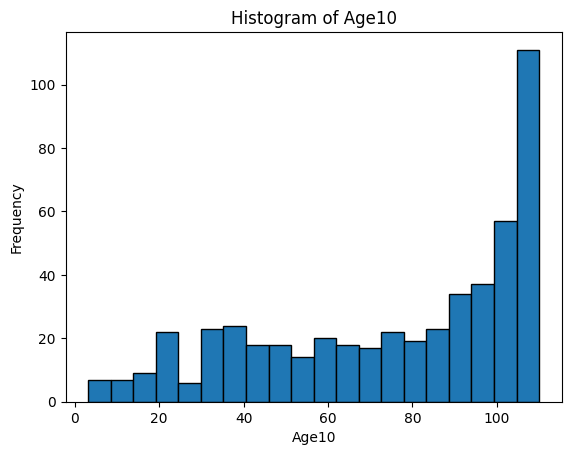

+-------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+-----------------+------------------+------------------+------------------+------------------+------------------+
|summary|              crim|                zn|             indus|              chas|               nox|                rm|               age|               dis|              rad|               tax|           ptratio|             lstat|              medv|             Age10|
+-------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+-----------------+------------------+------------------+------------------+------------------+------------------+
|  count|               506|               506|               506|               506|               506|               506|               506|               506|              

In [45]:
#Part 3: Count number of observation in the given dataset
# Count the number of rows in the DataFrame
num_rows = df.count()

print("Number of rows in the DataFrame:", num_rows)

##########################################################

#Part 4: Show the Schema of your dataset
# Print the schema of the DataFrame
df.printSchema()

##########################################################

#Part 5: Drop the column 'b' from your dataset

# Drop the 'b' column from the DataFrame
df = df.drop("b")
df_new = df

# Print the updated schema of the DataFrame
df_new.printSchema()

##########################################################

#Part 6: Round all of the numerical columns into two decimal place
#Import the round function
from pyspark.sql.functions import round as spark_round

# Round all numerical columns to two decimal places
numerical_columns = [col_name for col_name, dtype in df.dtypes if dtype in ('int', 'double')]
df_rounded = df.select([spark_round(col(c), 2).alias(c) if c in numerical_columns else c for c in df.columns])

# Show the rounded DataFrame
df_rounded.show(3)

#Show the schema of the rounded DataFrame
df_rounded.printSchema()

##########################################################

#Part 7: Create a new column (Age10)  with 10% increasing of 'age' column
# Import necessary libraries
from pyspark.sql.functions import col
df_rounded = df_rounded.withColumn("Age10", (col("age") * 1.1).cast("double"))

# Show the first 5 rows after adding the new column to verify
df_rounded.show(5)

##########################################################

#Part 8: Plot histogram of the Age10 column
# Plot histogram of the Age10 column
age10_data = df_rounded.select("Age10").rdd.flatMap(lambda x: x).collect()

#Import the matplotlib library
import matplotlib.pyplot as plt

plt.hist(age10_data, bins=20, edgecolor='black')
plt.xlabel('Age10')
plt.ylabel('Frequency')
plt.title('Histogram of Age10')
plt.show()

##########################################################

#Part 9: Provide Summary Statistics of all columns (count, mean, stddev,min, max)

from pyspark.sql import SparkSession
from pyspark.sql.functions import col, stddev # Import stddev here

# Provide summary statistics of all columns
summary_df = df_rounded.describe()

# Add standard deviation to the summary statistics
stddev_df = df_rounded.select([stddev(c).alias(c) for c in df_rounded.columns])

# Show summary statistics (count, mean, stddev, min, max)
summary_df.show()
stddev_df.show()

##########################################################

#Part 10: Convert  Spark Dataframe to Pandas Dataframe

# Convert Spark DataFrame to Pandas DataFrame
pandas_df = df_rounded.toPandas()


print("\n\nPart 10 Pandas Dataframe: \n")
# Show the first 5 rows of the Pandas DataFrame
print(pandas_df.head())



##########################################################

#Part 11: Show the last 5 rows of the Pandas DataFrame

print("\n\nPart 11 - Last 5 rows of Pandas Dataframe: \n")

print(pandas_df.tail(5))

##########################################################



